# Post Collection Analysis of Sensor and Image Data

In [49]:
# import librosa
import sys
import os
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt

In [50]:
IMAGE_SENSOR_NAMES = ["EYE_Log.mp4", "RGB_Log.mp4", "LSLAM_Log.mp4", "RSLMA_Log.mp4"]
DIRECTORIES = ["angry", "happy", "angryface", "happyface", "leftwink", "leftwinknod", "rightwink", "rightwinknod"]

In [51]:
SENSOR_LOGS = dict()
IMAGES = dict()

# Get the current directory
current_directory = os.path.join(os.getcwd(), "data_collection/")

# Loop through subdirectories and files
for directory in DIRECTORIES:
    print(f"Opening {directory} directory")
    temp_logs = dict()
    for root, dirs, files in os.walk(f"{current_directory}/{directory}"):
        for file in files:
            if file not in IMAGE_SENSOR_NAMES:
                file_path = os.path.join(current_directory, directory, file)
                try:
                    temp_logs[file.split(".")[0]] = np.loadtxt(file_path, delimiter=",")
                except Exception as e:
                    print(f"Could not read {file_path}: {e}")
    SENSOR_LOGS[directory] = temp_logs

Opening angry directory
Opening happy directory
Opening angryface directory
Opening happyface directory
Opening leftwink directory
Opening leftwinknod directory
Opening rightwink directory
Opening rightwinknod directory


In [52]:
print("Sensor log keys are:")
for i in SENSOR_LOGS.keys():
  print(f"- {i}")
print("\nThe stored logs are:")
for i in SENSOR_LOGS['angryface']:
  print(f"- {i}")

Sensor log keys are:
- angry
- happy
- angryface
- happyface
- leftwink
- leftwinknod
- rightwink
- rightwinknod

The stored logs are:
- Magno_Log
- IMU2_ACC_Log
- Baro_Log
- IMU1_GYRO_Log
- IMU1_ACC_Log
- IMU2_GYRO_Log
- Audio_Log


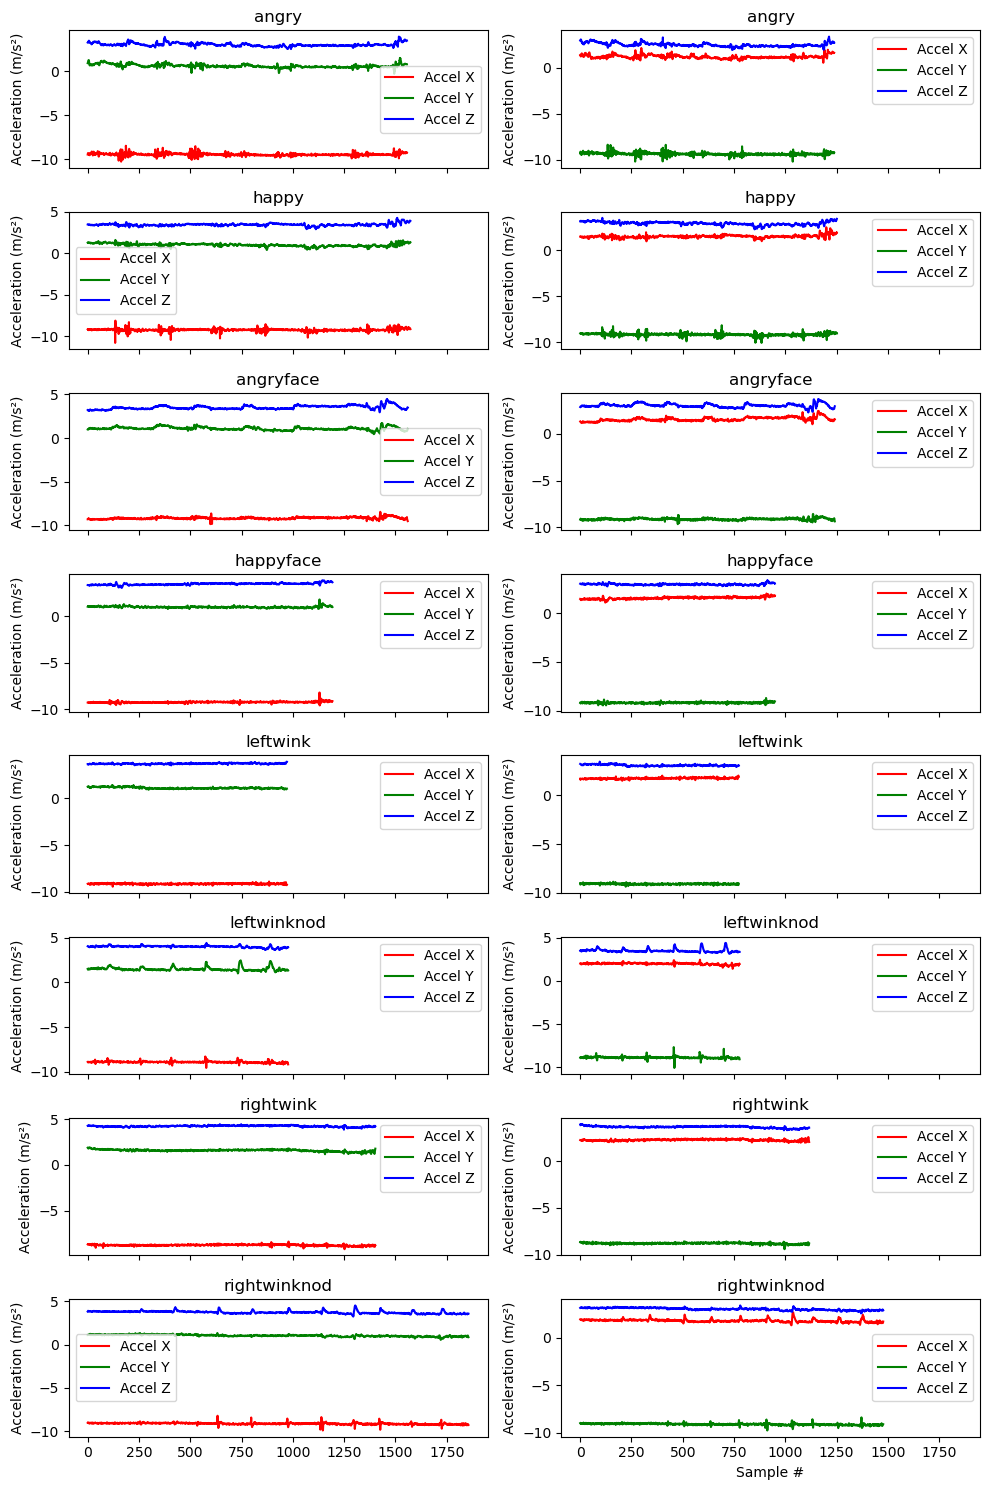

In [53]:
fig, axes = plt.subplots(len(DIRECTORIES), 2, figsize=(10, 15), sharex=True)

for idx, (foldername, folder) in enumerate(SENSOR_LOGS.items()):
  imu_data1 = folder["IMU1_ACC_Log"]
  imu_data2 = folder["IMU2_ACC_Log"]
  # time = imu_data[:, 0]
  time1 = np.arange(imu_data1.shape[0])
  accel_x = imu_data1[:, 1]
  accel_y = imu_data1[:, 2]
  accel_z = imu_data1[:, 3]
  axes[idx, 0].plot(time1, accel_x, label='Accel X', color='r')
  axes[idx, 0].plot(time1, accel_y, label='Accel Y', color='g')
  axes[idx, 0].plot(time1, accel_z, label='Accel Z', color='b')
  axes[idx, 0].set_ylabel('Acceleration (m/s²)')
  axes[idx, 0].set_title(foldername)
  axes[idx, 0].legend()

  time2 = np.arange(imu_data2.shape[0])
  accel_x = imu_data2[:, 1]
  accel_y = imu_data2[:, 2]
  accel_z = imu_data2[:, 3]
  axes[idx, 1].plot(time2, accel_x, label='Accel X', color='r')
  axes[idx, 1].plot(time2, accel_y, label='Accel Y', color='g')
  axes[idx, 1].plot(time2, accel_z, label='Accel Z', color='b')
  axes[idx, 1].set_ylabel('Acceleration (m/s²)')
  axes[idx, 1].set_title(foldername)
  axes[idx, 1].legend()

# plt.xlabel('Time (s)')
plt.xlabel("Sample #")
plt.tight_layout()
plt.show()

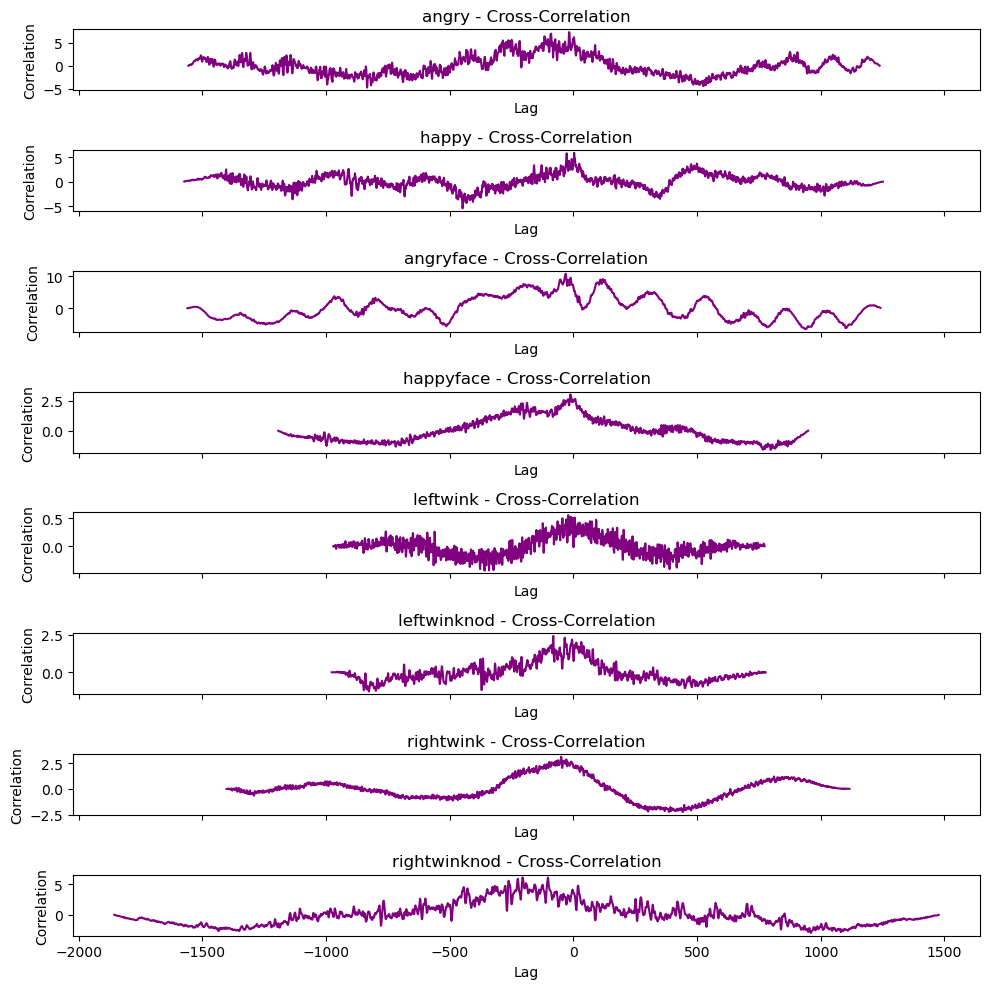

In [54]:
fig, axes = plt.subplots(len(DIRECTORIES), 1, figsize=(10, 10), sharex=True)

for i, (foldername, folder) in enumerate(SENSOR_LOGS.items()):
  imu_data1 = folder["IMU1_ACC_Log"]
  imu_data2 = folder["IMU2_ACC_Log"]
  
  accel_x1 = imu_data1[:, 1]
  accel_x2 = imu_data2[:, 1]

  accel_x1 = accel_x1 - np.mean(accel_x1)
  accel_x2 = accel_x2 - np.mean(accel_x2)

  lags = np.arange(-len(accel_x1) + 1, len(accel_x2))
  cross_corr = np.correlate(accel_x1, accel_x2, mode='full')

  axes[i].plot(lags, cross_corr, label='Cross-Corr (X-axis)', color='purple')
  axes[i].set_title(f"{foldername} - Cross-Correlation")
  axes[i].set_xlabel("Lag")
  axes[i].set_ylabel("Correlation")
  # axes[i].legend()

plt.tight_layout()
plt.show()

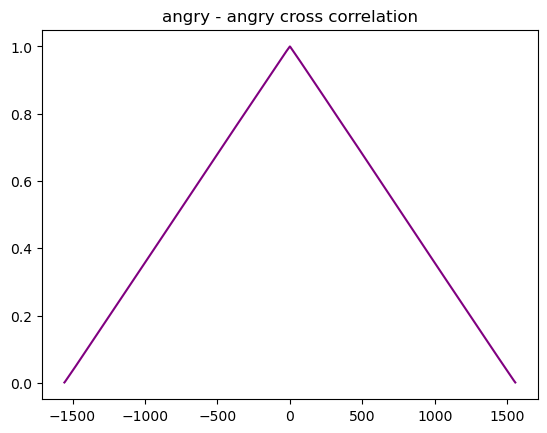

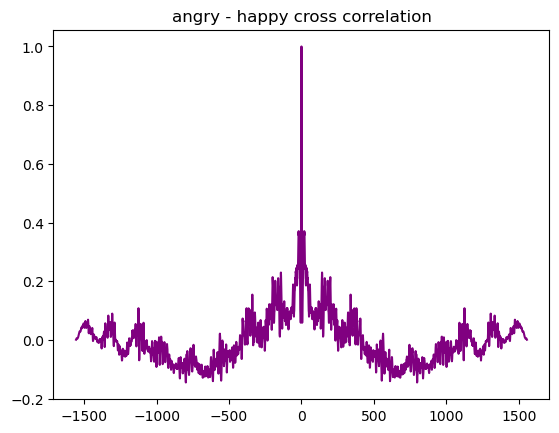

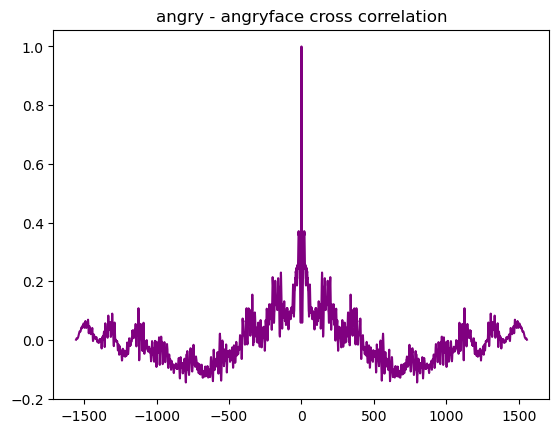

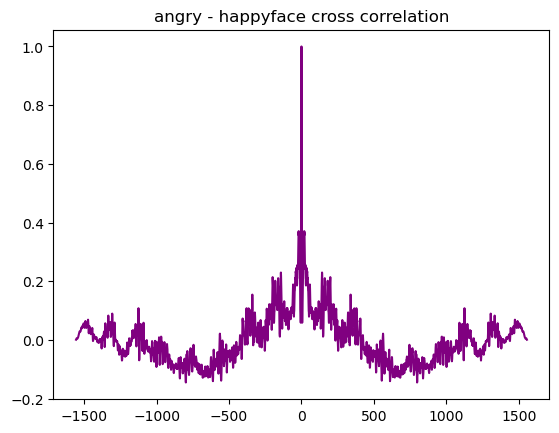

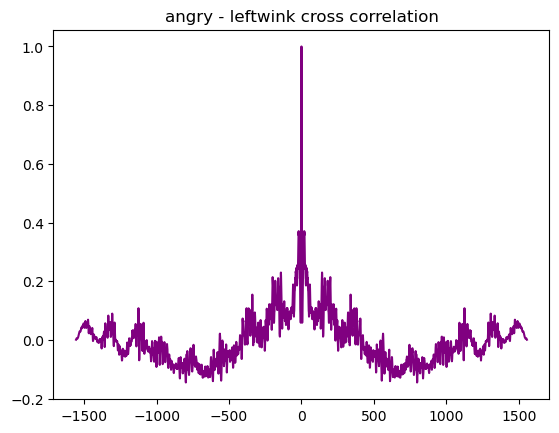

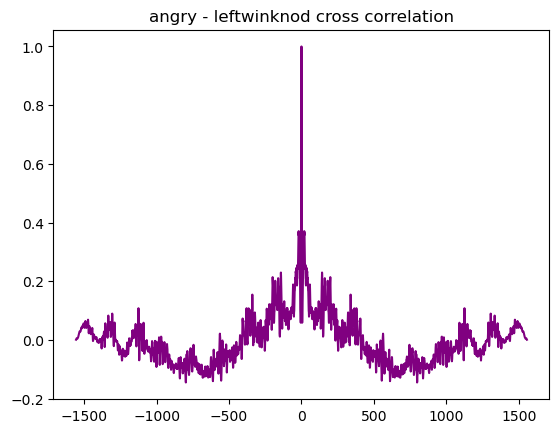

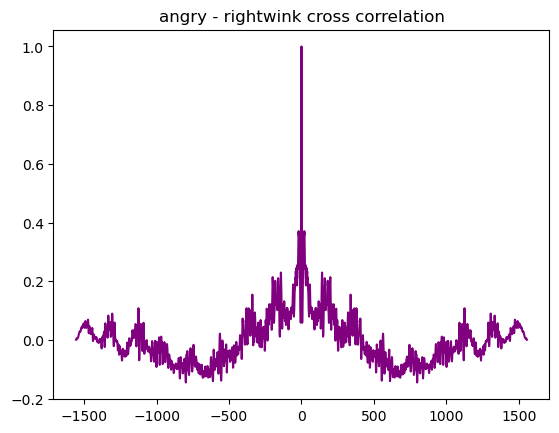

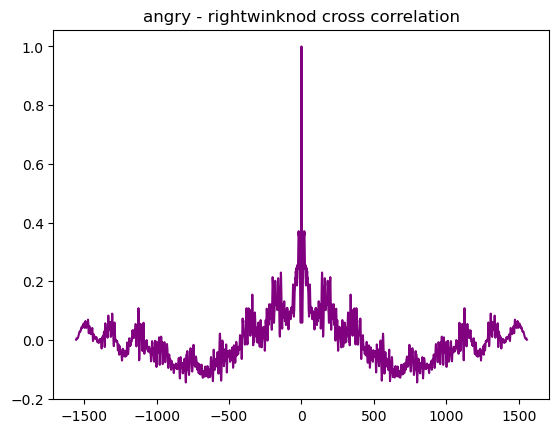

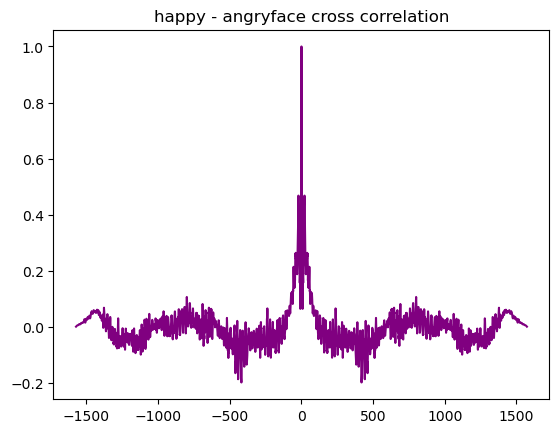

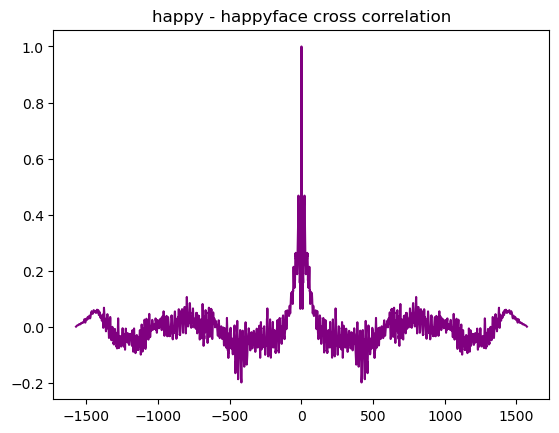

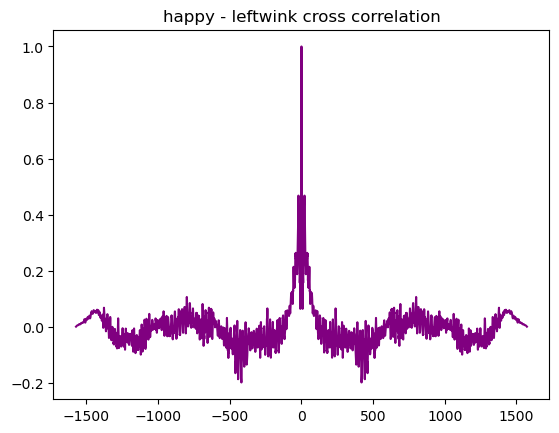

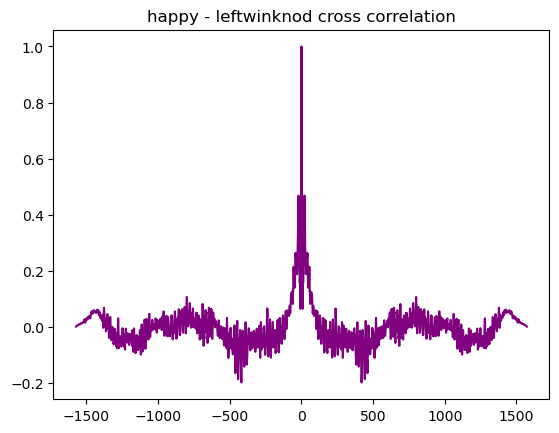

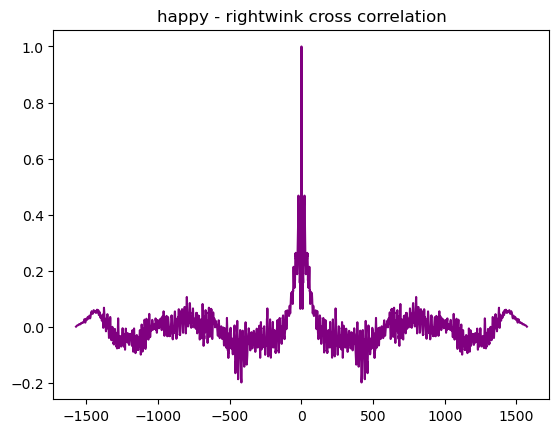

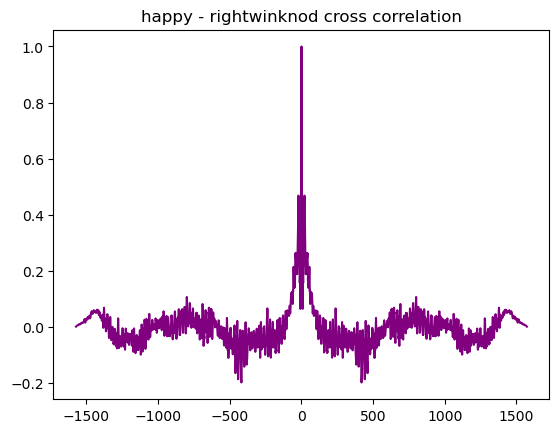

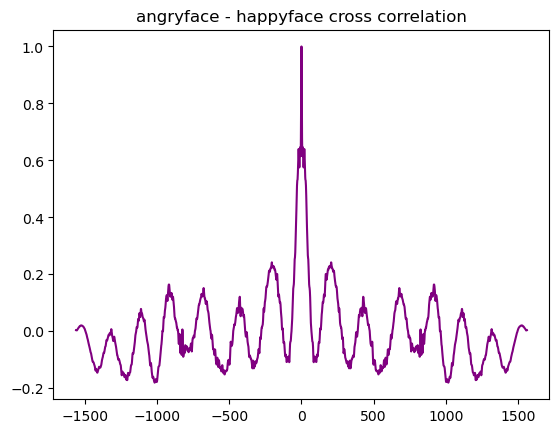

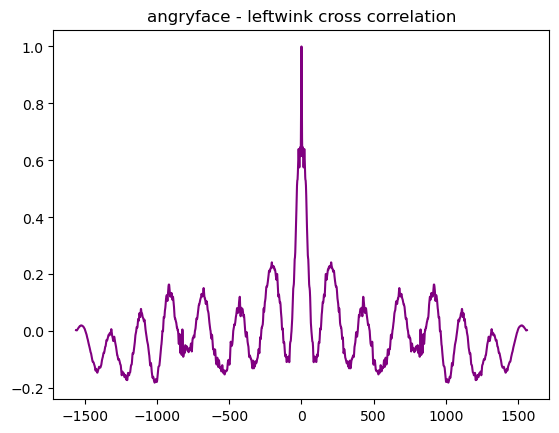

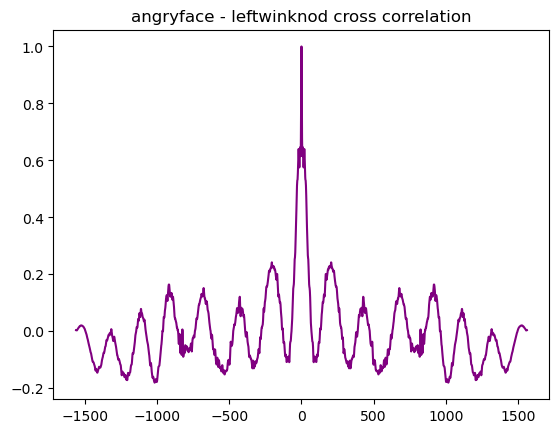

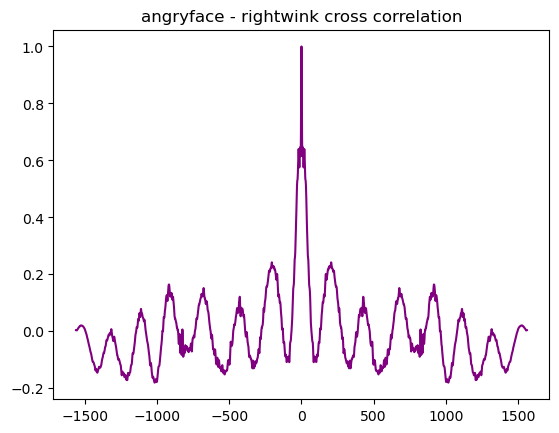

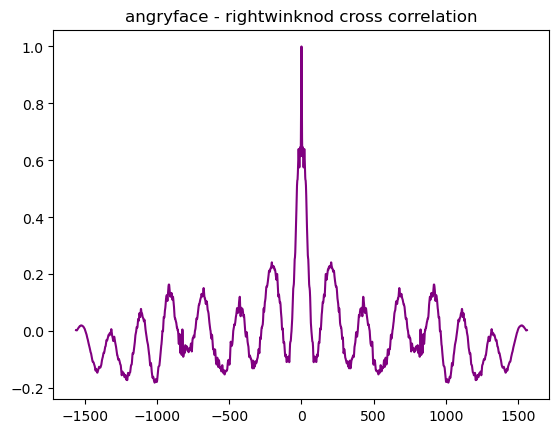

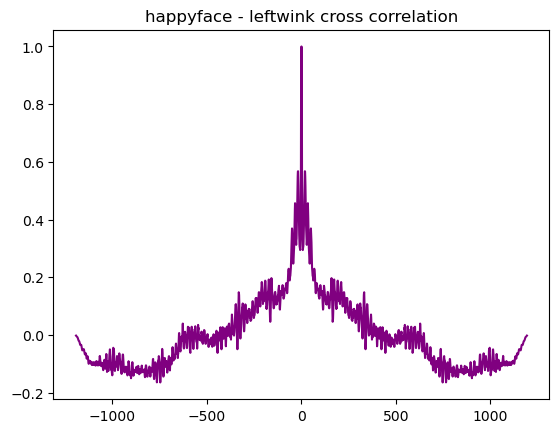

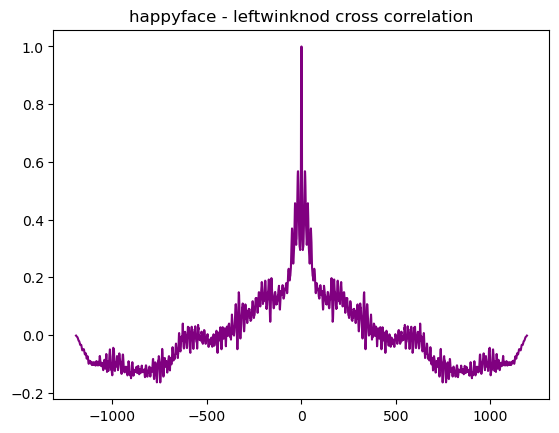

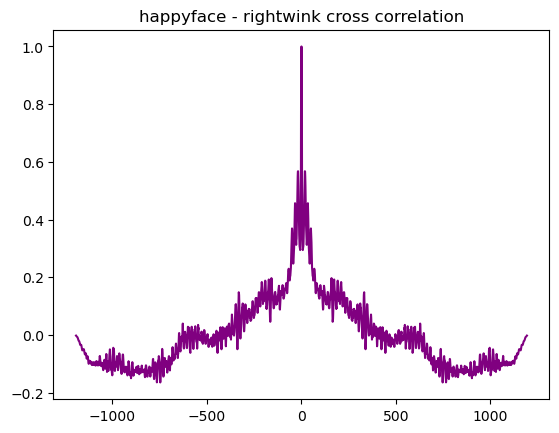

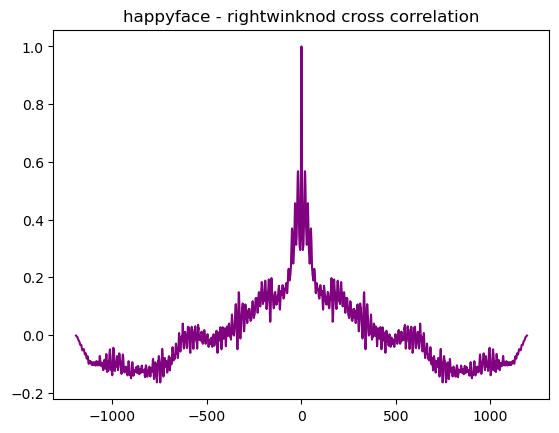

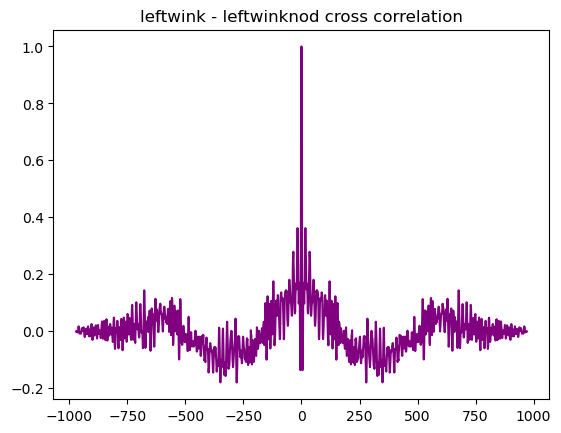

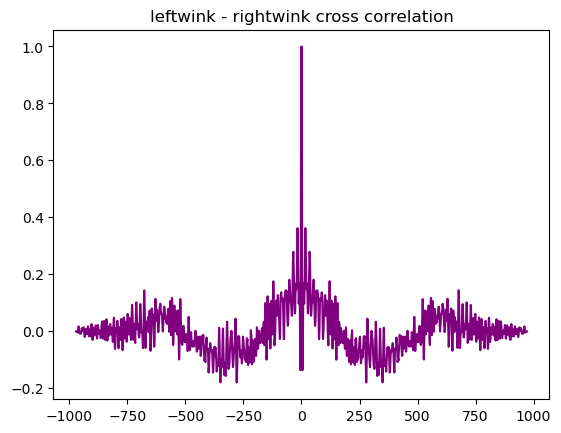

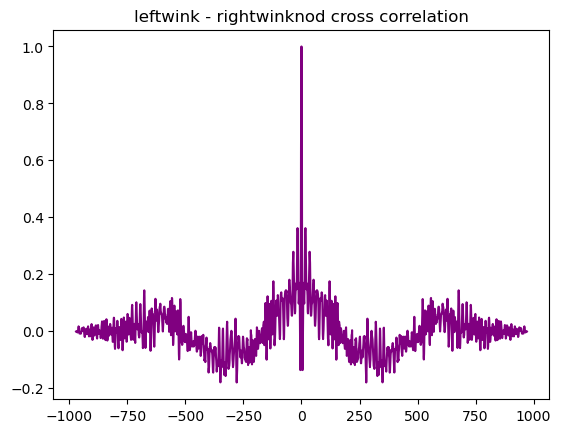

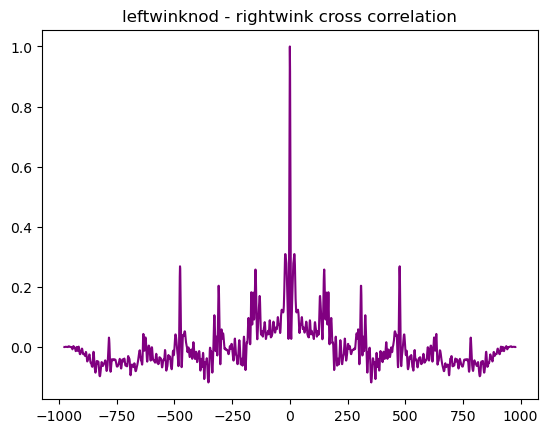

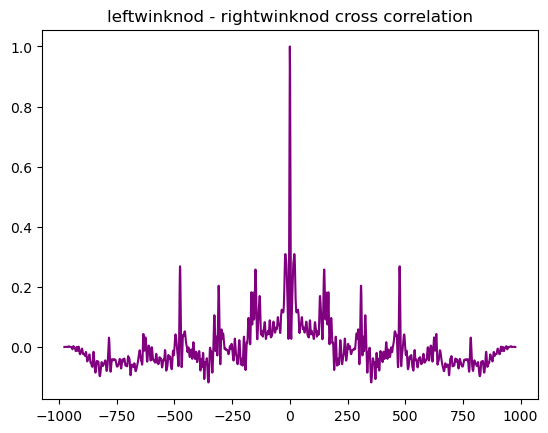

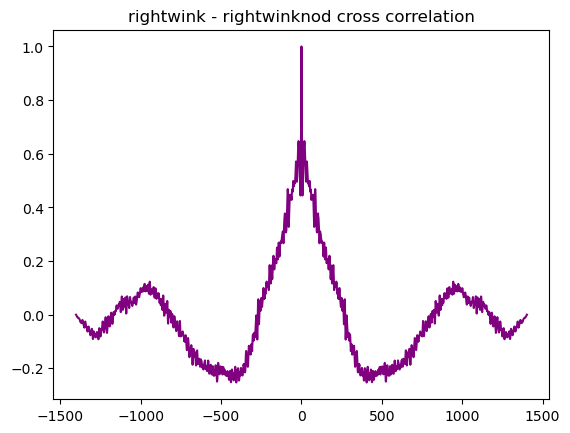

In [63]:
from itertools import combinations
from scipy.ndimage import uniform_filter1d

# Placeholder for IMU1 data extraction
imu1_data_dict = {}  # {foldername: imu1_data[:, 1:4]}  # Assuming 3 columns (X, Y, Z)

# Collect IMU1 data for each folder
for foldername, folder in SENSOR_LOGS.items():
    imu1_data_dict[foldername] = folder["IMU1_ACC_Log"][:, 1:4]  # Extracting X, Y, Z

# List of folder names
folder_names = list(imu1_data_dict.keys())

# Get unique pairs using combinations
unique_pairs = list(combinations(folder_names, 2))

a = imu1_data_dict['angry'][:, 0]
lags = np.arange(-len(a) + 1, len(a))
cross_corr = np.correlate(a, a, mode='full')
cross_corr = uniform_filter1d(cross_corr, size=5)
cross_corr = cross_corr / np.max(np.abs(cross_corr))
plt.plot(lags, cross_corr, label='Cross-Corr (X-axis)', color='purple')
plt.title(f"angry - angry cross correlation")
plt.show()

for pair in unique_pairs:
    imu_data1 = imu1_data_dict[pair[0]]
    imu_data2 = imu1_data_dict[pair[0]]

    accel_x1 = imu_data1[:, 0]
    accel_x2 = imu_data2[:, 0]

    accel_x1 = accel_x1 - np.mean(accel_x1)
    accel_x2 = accel_x2 - np.mean(accel_x2)

    min_len = min(len(accel_x1), len(accel_x2))
    accel_x1 = accel_x1[:min_len]
    accel_x2 = accel_x2[:min_len]

    lags = np.arange(-len(accel_x1) + 1, len(accel_x2))
    cross_corr = np.correlate(accel_x1, accel_x2, mode='full')
    cross_corr = uniform_filter1d(cross_corr, size=5)
    cross_corr = cross_corr / np.max(np.abs(cross_corr))
    plt.plot(lags, cross_corr, label='Cross-Corr (X-axis)', color='purple')
    plt.title(f"{pair[0]} - {pair[1]} cross correlation")
    plt.show()

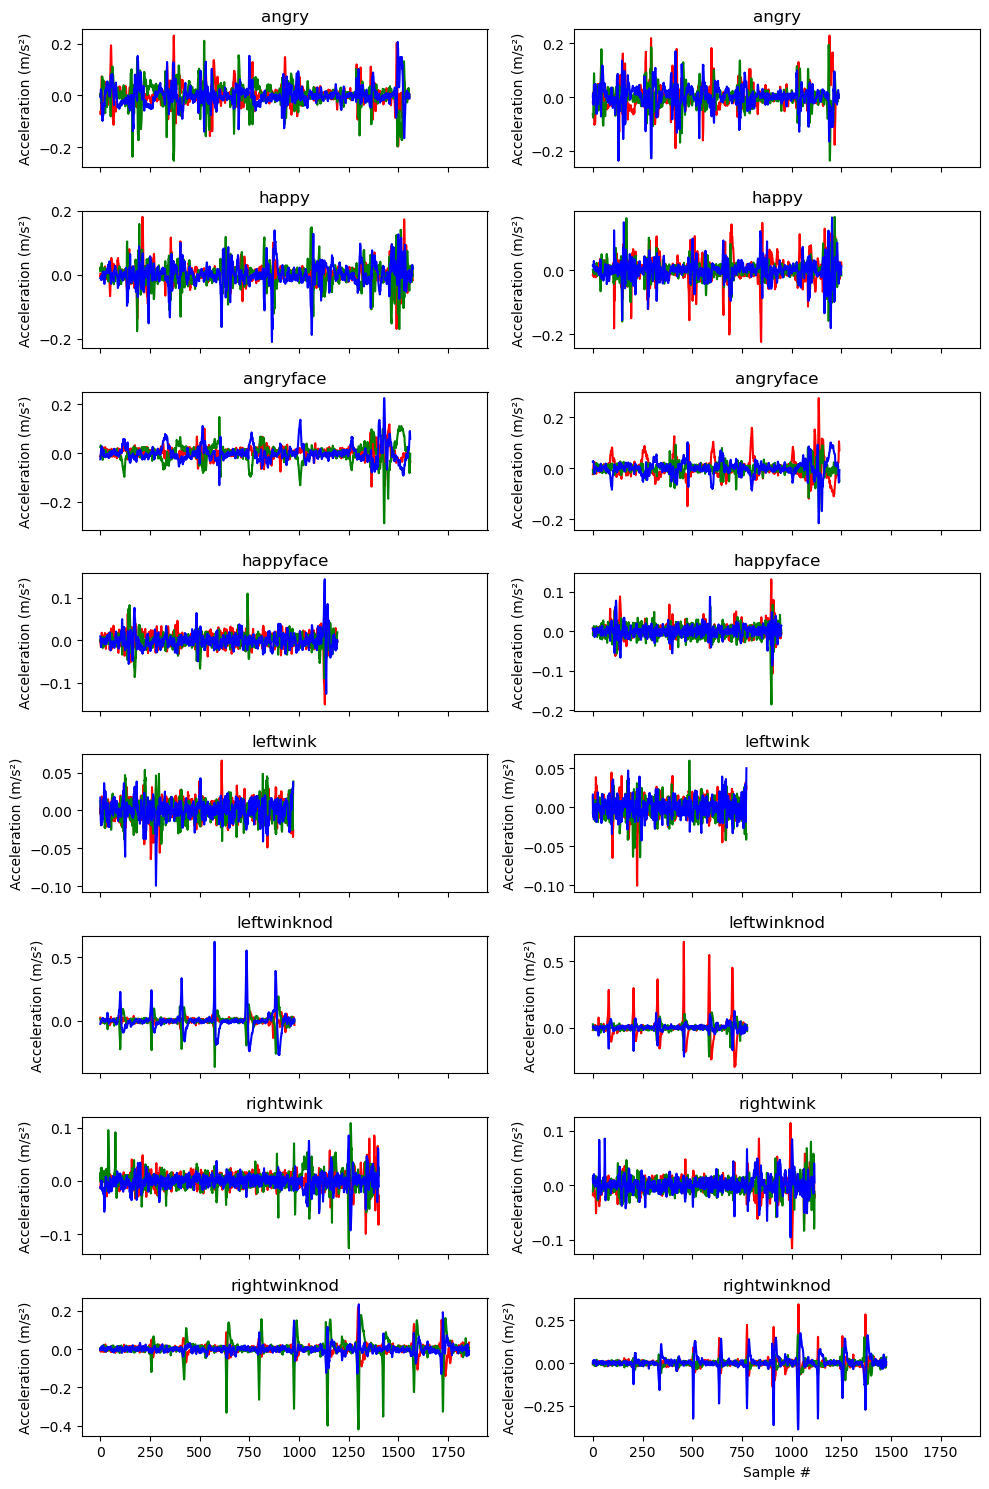

In [56]:
fig, axes = plt.subplots(len(DIRECTORIES), 2, figsize=(10, 15), sharex=True)

for idx, (foldername, folder) in enumerate(SENSOR_LOGS.items()):
  imu_data1 = folder["IMU1_GYRO_Log"]
  imu_data2 = folder["IMU2_GYRO_Log"]
  # time = imu_data[:, 0]
  time = np.arange(imu_data1.shape[0])
  accel_x = imu_data1[:, 1]
  accel_y = imu_data1[:, 2]
  accel_z = imu_data1[:, 3]
  axes[idx, 0].plot(time, accel_x, label='Accel X', color='r')
  axes[idx, 0].plot(time, accel_y, label='Accel Y', color='g')
  axes[idx, 0].plot(time, accel_z, label='Accel Z', color='b')
  axes[idx, 0].set_ylabel('Acceleration (m/s²)')
  axes[idx, 0].set_title(foldername)
  # axes[idx, 0].legend()

  time2 = np.arange(imu_data2.shape[0])
  accel_x = imu_data2[:, 1]
  accel_y = imu_data2[:, 2]
  accel_z = imu_data2[:, 3]
  axes[idx, 1].plot(time2, accel_x, label='Accel X', color='r')
  axes[idx, 1].plot(time2, accel_y, label='Accel Y', color='g')
  axes[idx, 1].plot(time2, accel_z, label='Accel Z', color='b')
  axes[idx, 1].set_ylabel('Acceleration (m/s²)')
  axes[idx, 1].set_title(foldername)
  # axes[idx, 1].legend()


# plt.xlabel('Time (s)')
plt.xlabel("Sample #")
plt.tight_layout()
plt.show()

# Cross correlation